<a href="https://colab.research.google.com/github/PabloDiosquez/Labo_De_Datos_UBA/blob/main/Clase_03_tercera_parte_Preparando_datos_reales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a ver qué tipo de preparación y estandarización o normalización es necesaria para algunas columnas de los datasets experimentales que introdujimos en la clase pasada.

Empecemos por el dataset de vacunación.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/LaboratorioDatos_UBA/vacunas_safe.csv'

df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0_seVacunoOEnEnsayo,0_forkEnte,0_forkNarrativa,0_forkVacuna,0_vacunaAplicada,0_preTeDarias,0_preEfectiva,0_preEfectosAdversos,0_mejoraColectivaCercana,0_mejoraColectivaLejana,...,0_ayudaCuidado,0_asistirDesconocidoTareaSimple,0_ayudaDesconocidoEncontrarAlgo,0_timePre,0_timeNarrativa,0_timePost,0_timeTerms,0_share,timestamp,hash
0,0,gubernamental,mejoraColectivaLejana,pfizer,-999,99,99,2,-999,4,...,6,3,6,9119,9581,10600,34162,-999,5/2/2021 12:37:15,-8530867232096866797
1,0,gubernamental,mejoraColectivaCercana,sinopharm,-999,100,74,49,3,-999,...,6,7,6,17393,13507,16723,30151,-999,5/2/2021 12:37:45,5227417009213588659
2,0,gubernamental,mejoraColectivaCercana,sinopharm,-999,98,94,10,1,-999,...,6,6,5,17032,15082,119616,7384,-999,5/2/2021 12:38:49,-218351779332136708
3,0,gubernamental,mejoraColectivaCercana,pfizer,-999,76,88,0,2,-999,...,7,6,2,19117,18796,8994,4069,-999,5/2/2021 12:43:07,-8721146152163509145
4,0,gubernamental,mejoraColectivaLejana,pfizer,-999,100,84,20,-999,3,...,5,7,6,27514,27605,18658,35336,-999,5/2/2021 12:39:21,-5310702376306721267


Vamos a cargar las columnas dadas por:

0_vacunaAplicada,	0_preTeDarias,	0_preEfectiva,	0_preEfectosAdversos,
0_vacunaUtilFrenar,	0_riesgoPropio,	0_riesgoConvive,	0_posturaVacunas, 0_covid', 0_medios, 0_diarios, 0_otros, 0_podcasts, 0_radio, 0_redesSociales,0_television, 0_youtube, 0_edad, 0_genero, hash

In [ ]:
df.columns
columnas = list(df.columns[4:8]) + list(df.columns[19:34]) + ['hash']
df_vacunas = df[columnas]
df_vacunas.head()

,0_vacunaAplicada,0_preTeDarias,0_preEfectiva,0_preEfectosAdversos,0_vacunaUtilFrenar,0_riesgoPropio,0_riesgoConvive,0_posturaVacunas,0_covid,0_medios,0_diarios,0_otros,0_podcasts,0_radio,0_redesSociales,0_television,0_youtube,0_edad,0_genero,hash
0,-999,99,99,2,100,1,1,100,4,"1,7",2,-999,-999,-999,3,-999,-999,26,2,-8530867232096866797
1,-999,100,74,49,100,2,2,100,2,"1,6,7",69,-999,-999,-999,"3,2",-999,Filo News,27,2,5227417009213588659
2,-999,98,94,10,94,2,2,96,2,"4,6,8",-999,???,-999,-999,-999,Ninguno,"No sigo ningún canal en particular, veo videos...",30,2,-218351779332136708
3,-999,76,88,0,100,2,2,100,4,"8,7",2,"Ministerio de Salud, Papers de investigación",-999,-999,-999,-999,-999,36,1,-8721146152163509145
4,-999,100,84,20,86,2,2,100,1,"1,2,7",69,-999,-999,Vorterix - Maldición va a ser un día hermoso,2,-999,-999,26,2,-5310702376306721267


La primera columna nos sirve para filtrar a aquellos que ya se dieron la vacuna.

In [ ]:
import numpy as np

print(df_vacunas['0_vacunaAplicada'].value_counts())
# -999: no fue vacunado
# los otros numeros indican vacunado con distintas vacunas

indice_no_vacunado = np.logical_not(df_vacunas['0_vacunaAplicada']==-999)
df_vacunados = df_vacunas.drop(df_vacunas[indice_no_vacunado].index)

print(df_vacunados['0_vacunaAplicada'].value_counts())

-999    6377
 1       211
 4        52
 2        45
 7        13
 3         5
 5         1
Name: 0_vacunaAplicada, dtype: int64
-999    6377
Name: 0_vacunaAplicada, dtype: int64


Otra cosa que podría pasar es que nos interese el z-score de las columnas '0_preTeDarias' (¿te darías la vacuna?) y '0_preEfectiva' (¿considerás que la vacuna es efectiva para frenar la pandemia?).

El problema es que por un sesgo en la gente que responde estas variables, vemos que una gran cantidad respondió 100 (máxima certeza) en ambas preguntas.

In [ ]:
print(df_vacunados['0_preTeDarias'].value_counts(),'\n')
print(df_vacunados['0_preEfectiva'].value_counts())

100    3676
99      231
0       188
98      125
97       82
       ... 
11        5
6         5
42        5
8         4
5         4
Name: 0_preTeDarias, Length: 101, dtype: int64 

100    1861
99      157
85      123
83      122
84      120
       ... 
4         3
6         3
5         2
12        2
16        2
Name: 0_preEfectiva, Length: 100, dtype: int64


Entonces podemos remover esta gente tan decidida y luego calcular z-scores.

In [ ]:
from scipy import stats

indice_seguros = np.logical_and(df_vacunados['0_preTeDarias']==100, df_vacunados['0_preEfectiva']==100)
df_vacunados = df_vacunados.drop(df_vacunados[indice_seguros].index)

df_vacunados['0_preTeDarias (z)'] = stats.zscore(df_vacunados['0_preTeDarias'])
df_vacunados['0_preEfectiva (z)'] = stats.zscore(df_vacunados['0_preEfectiva'])

df_vacunados.head()

,0_vacunaAplicada,0_preTeDarias,0_preEfectiva,0_preEfectosAdversos,0_vacunaUtilFrenar,0_riesgoPropio,0_riesgoConvive,0_posturaVacunas,0_covid,0_medios,...,0_podcasts,0_radio,0_redesSociales,0_television,0_youtube,0_edad,0_genero,hash,0_preTeDarias (z),0_preEfectiva (z)
0,-999,99,99,2,100,1,1,100,4,"1,7",...,-999,-999,3,-999,-999,26,2,-8530867232096866797,0.684339,1.232476
1,-999,100,74,49,100,2,2,100,2,"1,6,7",...,-999,-999,"3,2",-999,Filo News,27,2,5227417009213588659,0.718244,0.048990
2,-999,98,94,10,94,2,2,96,2,"4,6,8",...,-999,-999,-999,Ninguno,"No sigo ningún canal en particular, veo videos...",30,2,-218351779332136708,0.650433,0.995778
3,-999,76,88,0,100,2,2,100,4,"8,7",...,-999,-999,-999,-999,-999,36,1,-8721146152163509145,-0.095489,0.711742
4,-999,100,84,20,86,2,2,100,1,"1,2,7",...,-999,Vorterix - Maldición va a ser un día hermoso,2,-999,-999,26,2,-5310702376306721267,0.718244,0.522384


Lo mismo se puede hacer con las otras columnas numéricas.

Hay columnas más complicadas, donde en el experimento aparecen cajas de texto y los participantes pueden escribir, como en preguntas relacionadas a consumo de diarios, redes sociales o podcasts.

In [ ]:
#descomentar la que querramos ver
pd.options.display.max_rows = 2000
#print(df_vacunados['0_diarios'].value_counts())
#print(df_vacunados['0_redesSociales'].value_counts())
#print(df_vacunados['0_television'].value_counts())
print(df_vacunados['0_youtube'].value_counts())

-999                                                                                                                                                                                                                                                                                                                                                                                                                                                      4275
Filo news                                                                                                                                                                                                                                                                                                                                                                                                                                                   14
País de Boludos                                                                                           

Cada número representa una elección en un menú dropdown (desplegable)


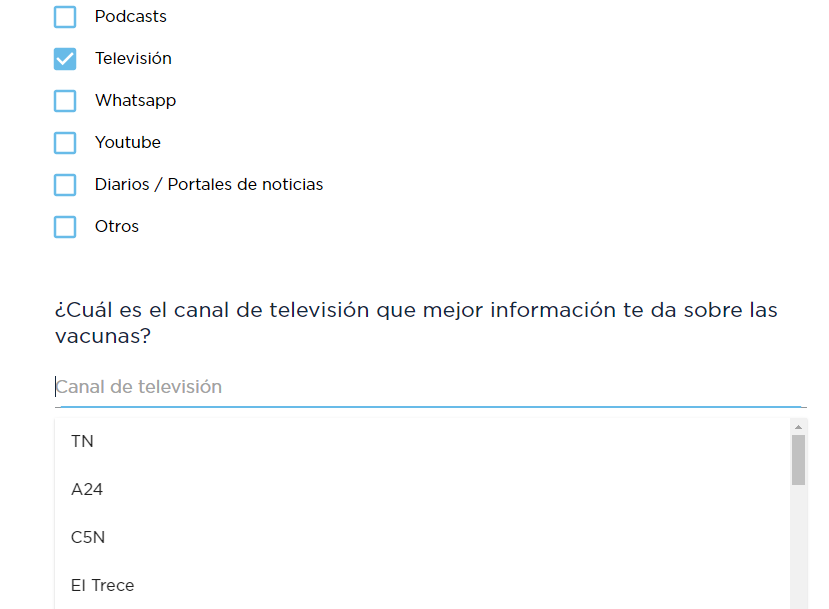

Pero algunas personas ingresaron manualmente el medio o la red social correspondiente, y hay que hacer un trabajo similar al que hicimos en los notebooks anteriores para limpiarlo.

# Algunos ejercicios para trabajar con este dataset

1.   Consideremos la columna '0_redesSociales'. En esta columna, se preguntó a los participantes qué redes sociales usan para informarse. Los participantes podían elegir varias opciones de una seria de respuestas prefijadas. Dichas respuestas se codifican en la base de datos de la siguiente forma:

*   **Facebook** corresponde a 1
*   **Instagram** corresponde a 2
*   **Twitter** corresponde a 3
*   **Tik Tok** corresponde a 4
*   **LinkedIn** corresponde a 5

    Observamos, no obstante, que muchas personas usaron el campo libre para escribir información redundante ("Instagram,youtube") o bien pusieron otras redes que no estaban contempladas ("3,2,Reddit") o bien pusieron respuestas completamente diferences ("No las uso para informarme.").

    La consigna es pensar un criterio de uniformidad que respete el código original (o sea, Facebook debe ir a 1, Instagram a 2, etc) de forma tal que cada entrada conste de números separados por comas, y las comas representen las 5 categorías originales, más otras pensadas por Ud. para uniformizar los datos. Luego, aplicar el criterio a los datos.

2.   Hay un campo llamado '0_youtube'. La pregunta es qué canales de YouTube usa la persona para informarse. **Este campo es muy heterogeneo.** La consigna es animarse a codificarlo de alguna forma, introduciendo categorías y números que las representen, y que todas las entradas de la columna pasen a ser listas de números.

3.   Implementar un código corrector de datos que se base en buscar la distancia de cada entra de una columna a un conjunto de palabras prefijadas. Armar un dataset de ejemplo que conste de 3 o 4 palabras, algunas de ellas escritas con errores ortográficos o bien con omisión de letras, y usar la función para corregir estos errores.

      Ayuda: Una buena opción para empezar es la distancia de Levenshtein, que se basa en calcular el número total de letras que hay que insertar, borrar, o sustituir por otra para transformar una palabra en la otra. Una ventaja respecto a otras métricas es que la distancia de Levenshtein no requiere que las palabras que se comparan sean de la misma longitud.  En este link (https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/) hay una descripción de la métrica (en inglés). En este otro link (https://pypi.org/project/python-Levenshtein/0.12.0/) hay un módulo de Python donde se implementa, así no lo tienen que hacer ustedes.